In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [13]:
DEFORMATION_METHODS = ["Random", "Mirror"]
OPTIMIZER_METHODS = ["Iterative", "Annealing"]
SMOOTHING_METHODS = ["Laplacian"]

In [24]:
def graph_json_annealing(filename):
    with open(filename) as json_file:
        json_data = json.load(json_file)
        name = json_data['ObjectName']
        seed = json_data['Seed']
        vertex_count = json_data['VertexCount']
        sampling_rate = json_data['SamplingRate']
        deformed_deviation = json_data['DeformedAngularDeviation']
        deformation_method = DEFORMATION_METHODS[json_data['DeformationMethod']]
        optimizer_method = OPTIMIZER_METHODS[json_data['OptimizerMethod']]
        smoothened = json_data['Smoothened']
        smoothing_method = SMOOTHING_METHODS[json_data['SmoothingMethod']] if smoothened else "None"
        vertex_selection_method = json_data['VertexSelectionMethod']
        offsets = np.array(json_data['Offsets'], dtype='float')
        chosen_vertices = np.array(json_data['ChosenVertices'], dtype='int')
        accepted_iterations = np.array(json_data['AcceptedIterations'], dtype='bool')
        ideal_normal_angles_from_ray = np.array(json_data['IdealNormalAnglesFromRay'], dtype='float')
        iterations = chosen_vertices.size
        optimized_deviations = np.array(json_data['OptimizedDeviations'], dtype='float')
        current_deviations = np.array(json_data['CurrentDeviations'], dtype=float)
        smooth_angular_deviation = json_data['SmoothenedAngularDeviation']
        time_ms = json_data['TimeMilliseconds']
        temps = np.array(json_data['Temperatures'], dtype=float)

        final_deviation = optimized_deviations[-1]
        deviation_diff_percent = (final_deviation - optimized_deviations[0]) / optimized_deviations[0] * 100
        effective_iterations = np.sum(accepted_iterations)

        info = f"Plot of total angular deviation for {iterations} iterations\n"
        info += f"Object: {name}\n"
        info += f"Vertices: {vertex_count} (if more vertices then expected, that is because of UV mapping. Vertices that only differ in UV coordinates are still treated at the same time)\n"
        if (deformation_method == "Random" or vertex_selection_method == "Random"):
            info += f"Seed {seed}\n"
        info += f"Deformation method: {deformation_method}\n"
        info += f"Optimizer method: {optimizer_method}\n"
        info += f"Vertex selection method: {vertex_selection_method}\n"
        info += f"Smoothing: {smoothing_method}\n"
        info += f"{effective_iterations} iterations of total amount ({np.round(effective_iterations/iterations*100, 2)}%) reduced the minimum\n"
        info += f"Time: {time_ms} ms\n"
        info += f"Total angular deviation reduced from {np.round(deformed_deviation, 2)} to {np.round(final_deviation, 2)} ({np.round(deviation_diff_percent, 2)}%)\n"
        print(info)

        fig= plt.figure()
        lnsOpt = plt.plot(range(iterations), current_deviations, label='Optimized TADoN')
        if (smoothened):
            lnsSm = plt.plot([0, iterations-1], [smooth_angular_deviation, smooth_angular_deviation], label="Smoothened TADoN")

        plt.xlabel("Iterations")
        plt.ylabel("TADoN (degrees)")

        ax2 = plt.twinx()
        lnsTemp = ax2.plot(range(iterations), temps, color='red', label='Temperature')
        ax2.set_ylabel("Temperature")
        
        lns = lnsOpt + lnsTemp
        if (smoothened):
            lns += lnsSm
        labels = [l.get_label() for l in lns]
        plt.legend(lns, labels)
            
        fig.tight_layout()
        fig.show()

Plot of total angular deviation for 1000 iterations
Object: High Vertex Cube
Vertices: 1734 (if more vertices then expected, that is because of UV mapping. Vertices that only differ in UV coordinates are still treated at the same time)
Seed 0
Deformation method: Random
Optimizer method: Annealing
Vertex selection method: Random
Smoothing: Laplacian
275 iterations of total amount (27.5%) reduced the minimum
Time: 7695 ms
Total angular deviation reduced from 7661.0 to 6661.79 (-12.98%)



/var/folders/ht/fjyngybj4s19bb50tv72p70h0000gn/T/ipykernel_66561/815084528.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


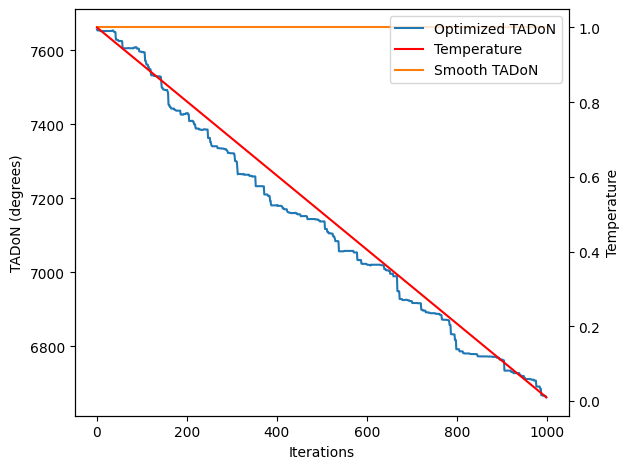

In [27]:
graph_json_annealing("High_Vertex_Cube_Random_1000-Annealing_in_-0.10_to_0.10_temp_1.00_to_0.01_Laplacian.json")